#DATA PREPROCESSING

#1.IMPORT LIBRARIES

In [1]:
# devak reddy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#2.IMPORT DATASET

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#3.HANDLING NULL VALUES

In [9]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df.Cabin.nunique()

147

In [14]:
# IMPUTATION WITH MEAN FOR AGE COLUMN

In [15]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [16]:
df["Age"].isnull().sum() #null values removed for Age column

0

In [17]:
# IMPUTATION WITH MODE FOR EMBARKED COLUMN

In [18]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [19]:
df["Embarked"].isnull().sum() #null values removed for Embarked column

0

In [20]:
# REMOVAL OF THE CABIN COLUMN

In [21]:
df.drop("Cabin", axis=1, inplace=True)

In [22]:
df.shape
# Cabin column is removed

(891, 11)

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

4.DATA VISUALISATION

In [24]:
df.corr().Fare.sort_values(ascending=False)

<ipython-input-24-f51f352aac84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().Fare.sort_values(ascending=False)


Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.091566
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64

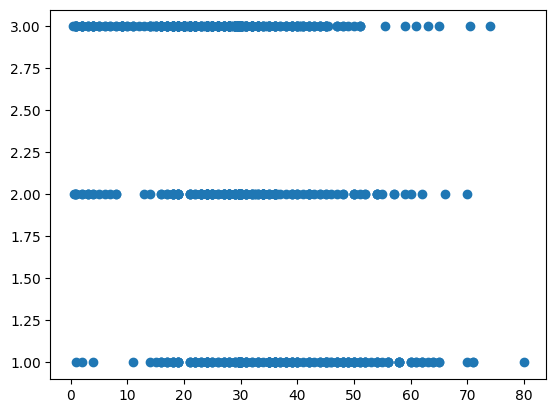

In [25]:
plt.scatter(df["Age"],df["Pclass"])

In [26]:
#INFERENCE:
#Age vs. Pclass (Inverse): Older passengers tended to be in lower classes, while younger passengers were more often found in higher classes, suggesting an inversely direct relationship between age and class.

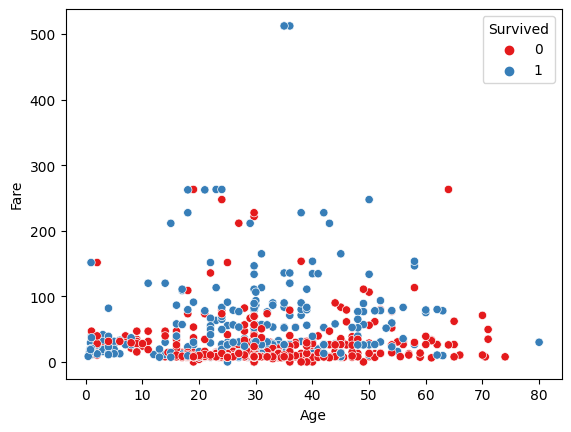

In [27]:
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived', palette='Set1')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

In [28]:
#INFERENCE:
#The scatter plot shows that there is no clear boundary separating survivors from non-survivors based solely on age and fare.

<ipython-input-64-380596f716a9>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='Set1',ci=None)


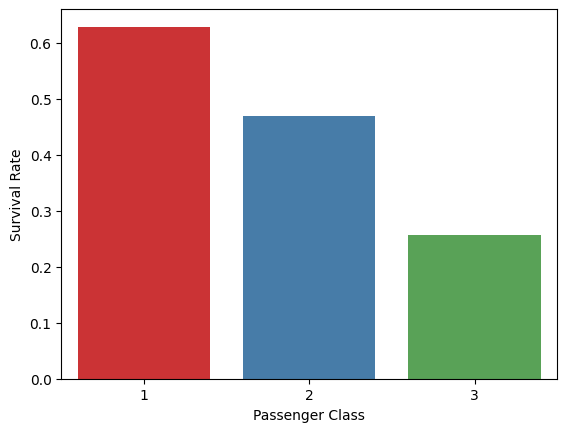

In [64]:

sns.barplot(x='Pclass', y='Survived', data=df, palette='Set1',ci=None)
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

In [30]:
#  INFERENCE:
#  Passengers in higher classes (1st class) had a significantly higher survival rate compared to those in lower classes (3rd class).

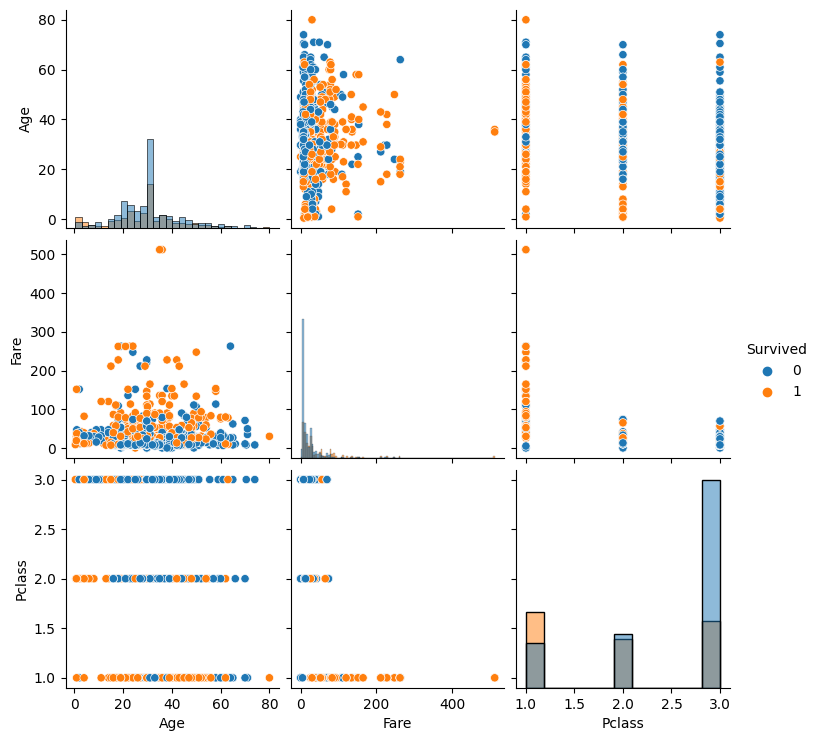

In [31]:

columns_to_plot = ['Age', 'Fare', 'Survived', 'Pclass']
sns.pairplot(df[columns_to_plot], hue='Survived', diag_kind='hist')
plt.show()

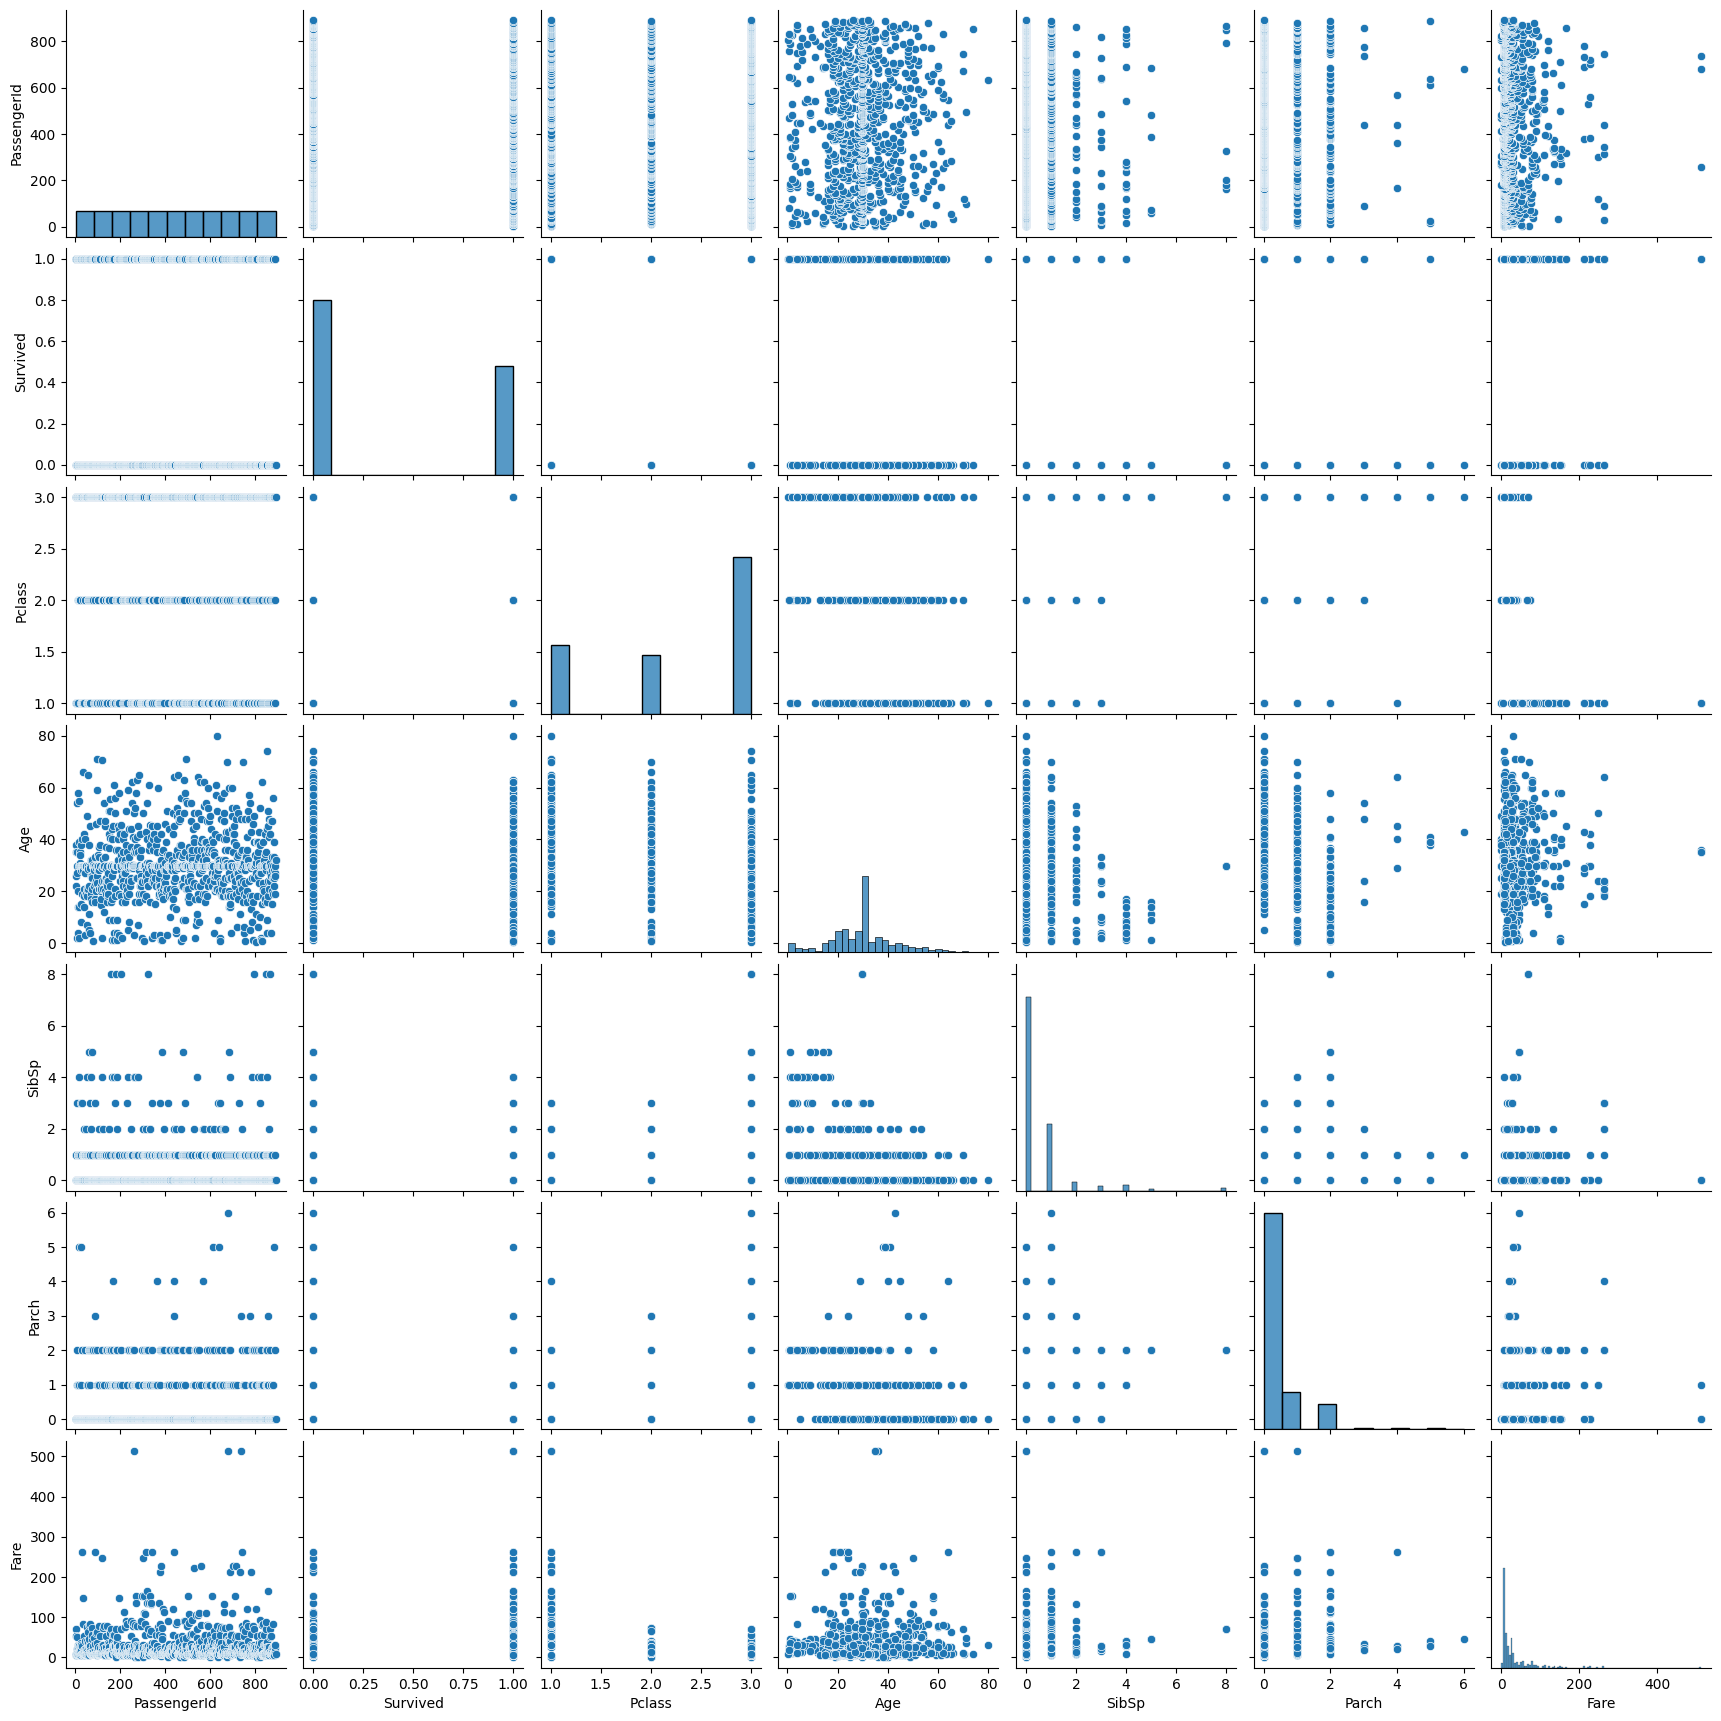

In [32]:
sns.pairplot(df)

<ipython-input-33-b11be6d25f21>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=custom_colors)


<Axes: >

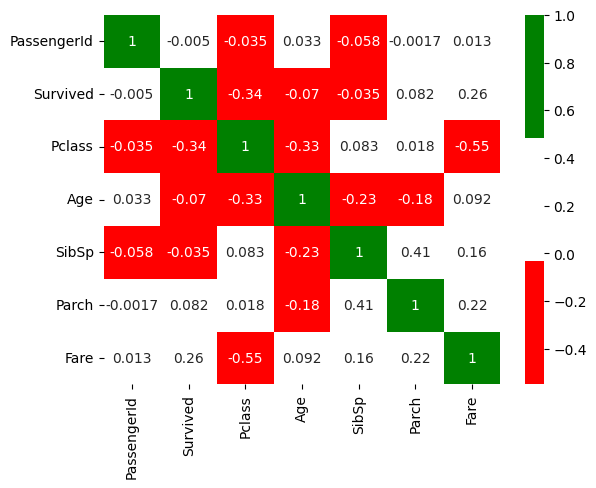

In [33]:
custom_colors = ['#ff0000', '#ffffff', '#008000']  # Red, White, Green
sns.heatmap(df.corr(), annot=True, cmap=custom_colors)

      INFERENCE:
      1.Survived vs. Pclass (Inverse): Higher passenger class (e.g., 1st class) is positively correlated with survival, meaning passengers in higher classes were more likely to survive.

      2.Survived vs. Fare (Direct): Passengers who paid higher fares had a better chance of survival, indicating a direct relationship between fare and survival.

      3.Pclass vs. Fare (Inverse): Lower passenger class (e.g., 3rd class) was associated with higher fares, showing an inversely direct relationship between class and fare.

      4.Age vs. Pclass (Inverse): Older passengers tended to be in lower classes, while younger passengers were more often found in higher classes, suggesting an inversely direct relationship between age and class.






5.OUTLIER DETECTION

<Axes: >

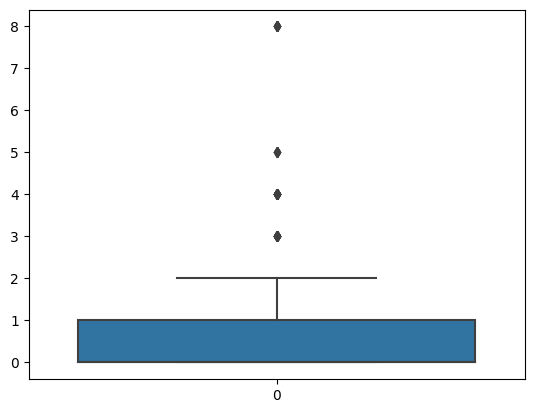

In [34]:
#SibSp
sns.boxplot(df["SibSp"]) #IQR methode

In [35]:
q1=df.SibSp.quantile(0.25)
q3=df.SibSp.quantile(0.75)
print(q1)
print(q3)

0.0
1.0


In [36]:
IQR=q3-q1
IQR

1.0

In [37]:
upper_limit=q3+1.5*IQR
upper_limit

2.5

In [38]:
df.median() #50% quantile

<ipython-input-38-db7476078f8f>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median() #50% quantile


PassengerId    446.000000
Survived         0.000000
Pclass           3.000000
Age             29.699118
SibSp            0.000000
Parch            0.000000
Fare            14.454200
dtype: float64

In [39]:
df=df[df.SibSp<upper_limit]

<Axes: >

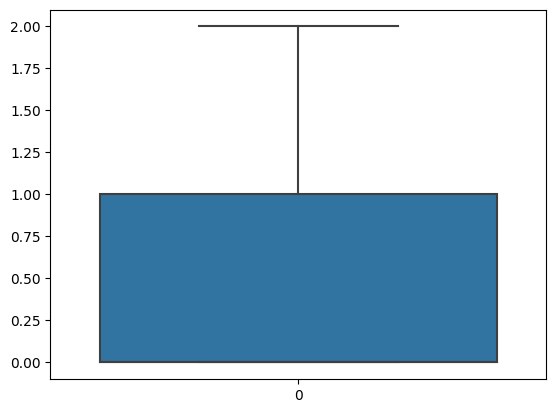

In [40]:
sns.boxplot(df["SibSp"])

<Axes: >

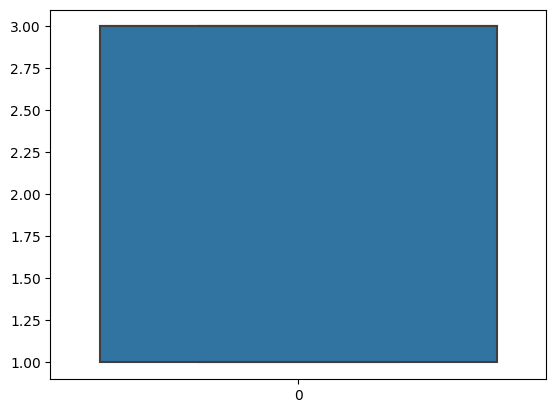

In [41]:
#Pclass
sns.boxplot(df.Pclass)

<Axes: >

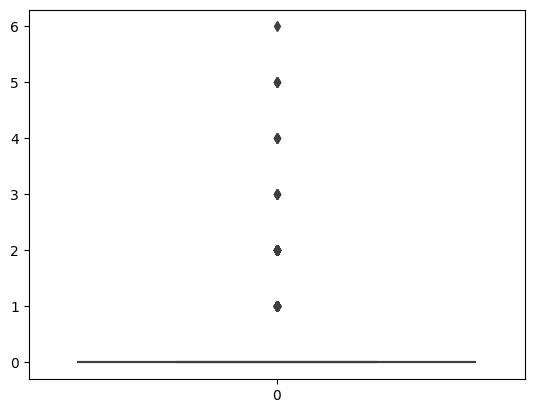

In [42]:
#Parch
sns.boxplot(df.Parch)

In [43]:
from scipy import stats

In [44]:
Parch_zscore=stats.zscore(df.Parch)
Parch_zscore

0     -0.414384
1     -0.414384
2     -0.414384
3     -0.414384
4     -0.414384
         ...   
886   -0.414384
887   -0.414384
888    2.198711
889   -0.414384
890   -0.414384
Name: Parch, Length: 845, dtype: float64

<Axes: >

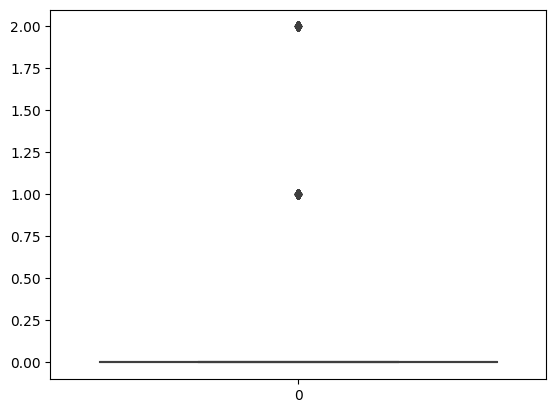

In [45]:
df_z=df[np.abs(Parch_zscore)<=3]
sns.boxplot(df_z.Parch)

<Axes: >

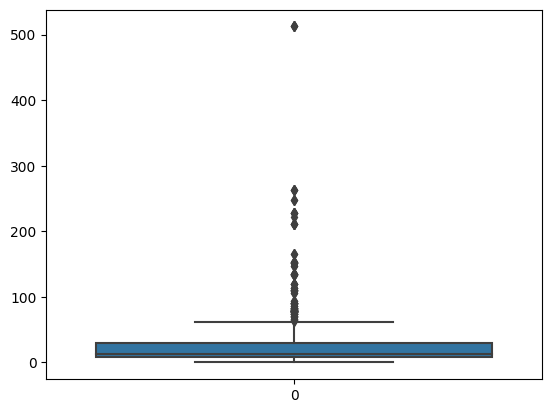

In [46]:
#Fare
sns.boxplot(df.Fare)

In [47]:
#Fare
lower_percentile = 5
upper_percentile = 80

# Calculate the lower and upper bounds based on percentiles
lower_bound = df['Fare'].quantile(lower_percentile / 100)
upper_bound = df['Fare'].quantile(upper_percentile / 100)

<Axes: ylabel='Fare'>

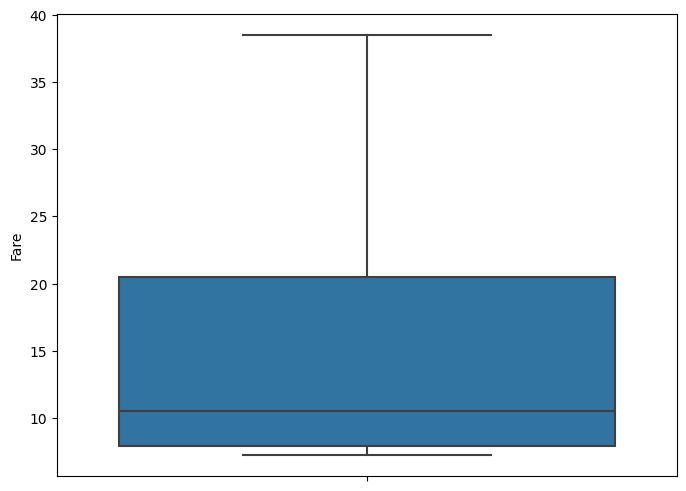

In [48]:
df_no_outliers = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Create a boxplot to visualize the 'Age' column without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_outliers, y='Fare')

In [49]:
#Age
lower_percentile = 5
upper_percentile = 85

# Calculate the lower and upper bounds based on percentiles
lower_bound = df['Age'].quantile(lower_percentile / 100)
upper_bound = df['Age'].quantile(upper_percentile / 100)

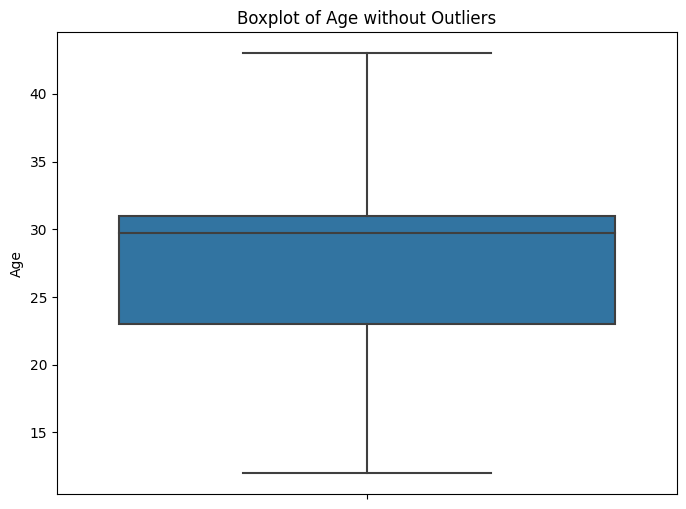

In [50]:
df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Create a boxplot to visualize the 'Age' column without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_outliers, y='Age')
plt.title('Boxplot of Age without Outliers')
plt.show()

6.SPLITTING OF DEPENDENT AND INDEPENDENT DATA<br>
Survived---dependent


---



In [51]:
columns_d=["Survived","PassengerId","Name","Sex","Ticket"]
x=df.drop(columns=columns_d)
x.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked
0,3,22.0,1,0,7.2500,S
1,1,38.0,1,0,71.2833,C
2,3,26.0,0,0,7.9250,S
3,1,35.0,1,0,53.1000,S
4,3,35.0,0,0,8.0500,S


In [52]:
type(x)

pandas.core.frame.DataFrame

In [53]:
y=df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 845, dtype: int64

In [54]:
type(y)

pandas.core.series.Series

7.ENCODING

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [56]:
# encoding for embarked column
x.Embarked.value_counts()

S    604
C    168
Q     73
Name: Embarked, dtype: int64

In [57]:
x["Embarked"]=le.fit_transform(x["Embarked"])

In [58]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'C': 0, 'Q': 1, 'S': 2}

8.SCALING FEATURES

In [59]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [60]:
x_Scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)
x_Scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.271174,0.5,0.0,0.014151,1.0
1,0.0,0.472229,0.5,0.0,0.139136,0.0
2,1.0,0.321438,0.0,0.0,0.015469,1.0
3,0.0,0.434531,0.5,0.0,0.103644,1.0
4,1.0,0.434531,0.0,0.0,0.015713,1.0


9.SPLIT TRAINING AND TESTING DATA

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_Scaled,y,test_size=0.2,random_state=0)

In [62]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(676, 6) (169, 6) (676,) (169,)
